In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### forecasting using FBprophet is so easy lets see

In [2]:
from fbprophet import Prophet
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = (20, 8)

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/master/examples/example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


#### dataframe must have column name in the form of (ds, y)

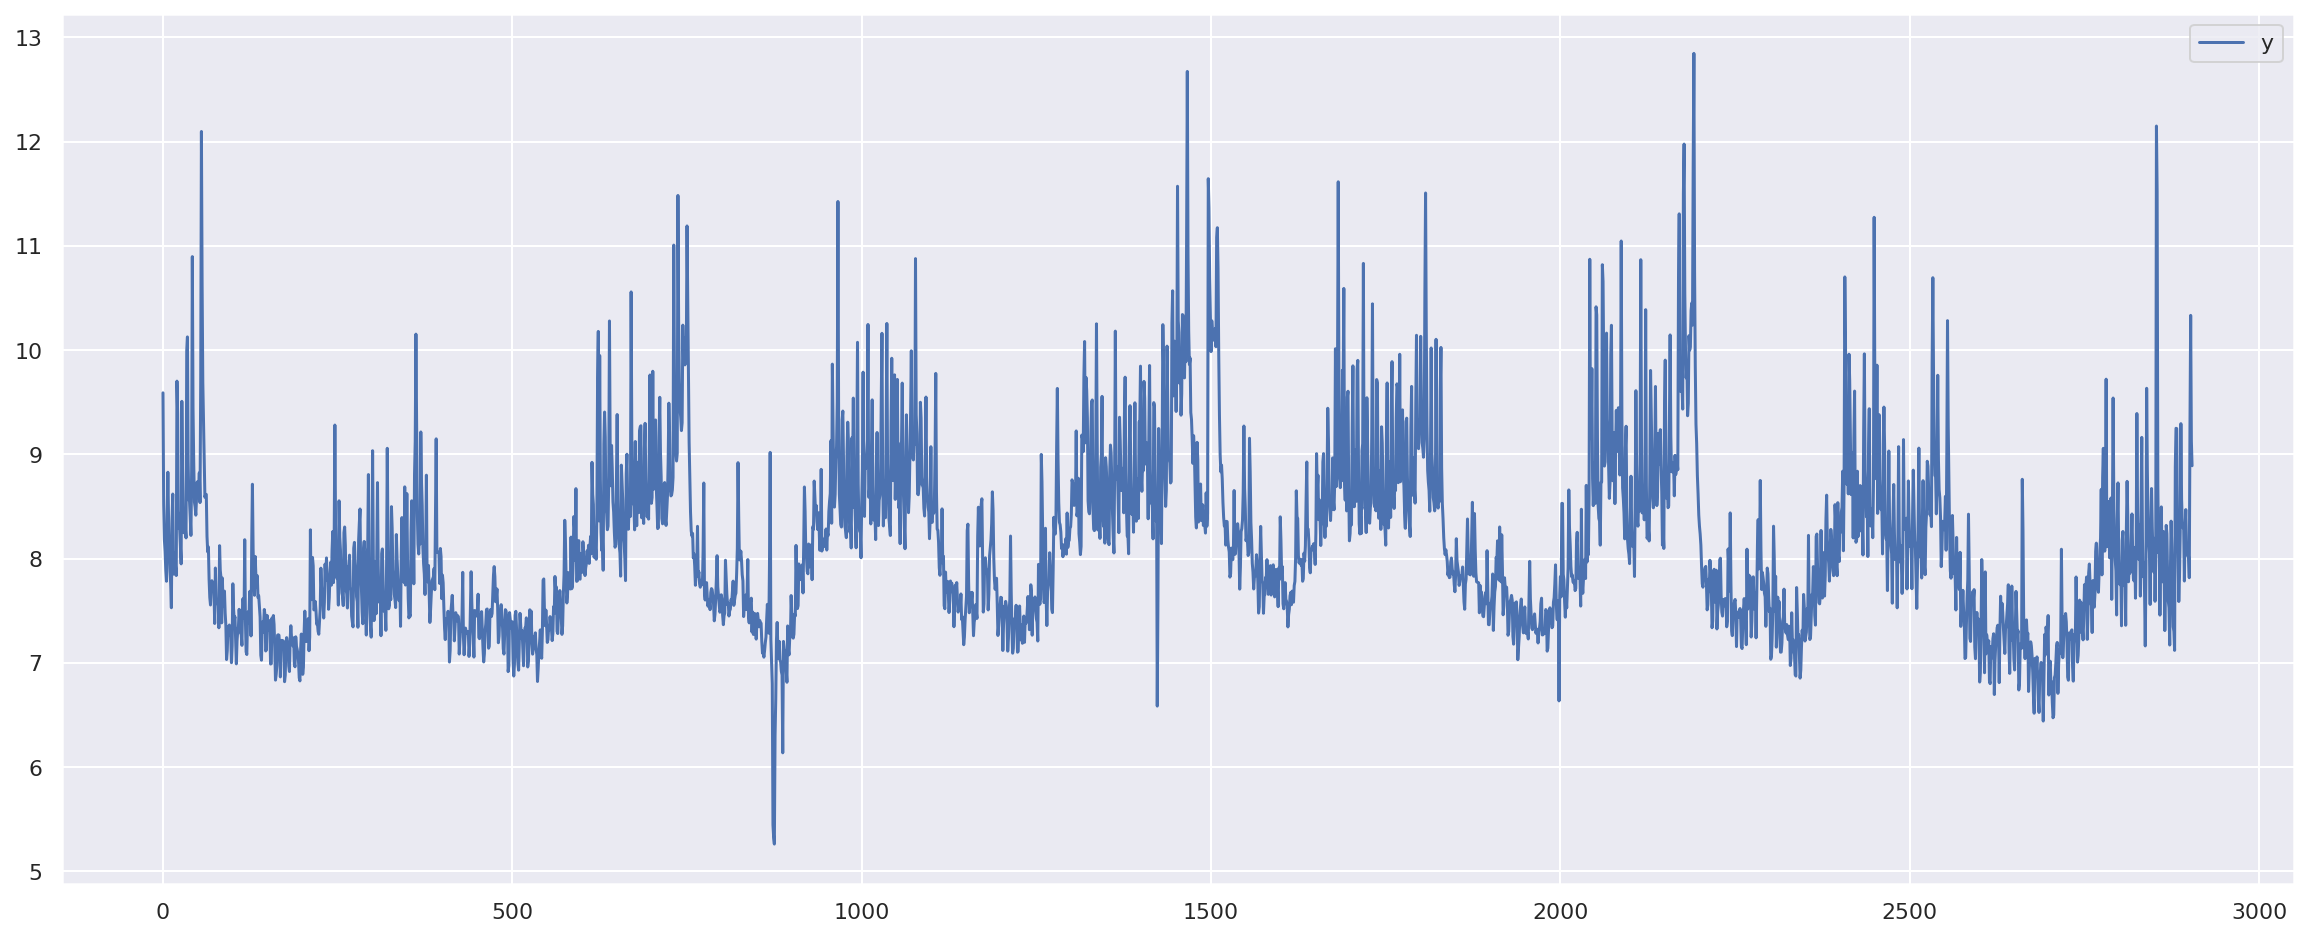

In [4]:
df.plot()
plt.show()

In [5]:
df.shape

(2905, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2905 entries, 0 to 2904
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      2905 non-null   object 
 1   y       2905 non-null   float64
dtypes: float64(1), object(1)
memory usage: 45.5+ KB


In [7]:
# for prophet we must have columns (ds, y) in this form
df['ds'] = pd.to_datetime(df['ds'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2905 entries, 0 to 2904
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      2905 non-null   datetime64[ns]
 1   y       2905 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 45.5 KB


In [9]:
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


#### splitting the data to see how accurate is the fbprophet library is 

In [10]:
train,test = df[:int(len(df)*0.8)],df[int(len(df)*0.8):]

In [11]:
print(len(train),len(test))

2324 581


In [12]:
test.tail()

,ds,y
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871
2904,2016-01-20,8.891374


In [13]:
model = Prophet()
model.fit(train)

In [53]:
future_dates = model.make_future_dataframe(periods = 581)
                                          
                                          


In [54]:
future_dates.tail()

,ds
2900,2016-01-13
2901,2016-01-14
2902,2016-01-15
2903,2016-01-16
2904,2016-01-17


In [55]:
prediction = model.predict(future_dates)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,8.023804,8.216276,9.484514,8.023804,8.023804,0.807561,0.807561,0.807561,0.330869,0.330869,0.330869,0.476692,0.476692,0.476692,0.0,0.0,0.0,8.831365
1,2007-12-11,8.022343,7.963916,9.235672,8.022343,8.022343,0.569444,0.569444,0.569444,0.105583,0.105583,0.105583,0.463860,0.463860,0.463860,0.0,0.0,0.0,8.591787
2,2007-12-12,8.020883,7.756744,8.997774,8.020883,8.020883,0.381254,0.381254,0.381254,-0.070730,-0.070730,-0.070730,0.451984,0.451984,0.451984,0.0,0.0,0.0,8.402136
3,2007-12-13,8.019422,7.755438,9.059827,8.019422,8.019422,0.360144,0.360144,0.360144,-0.081259,-0.081259,-0.081259,0.441402,0.441402,0.441402,0.0,0.0,0.0,8.379566
4,2007-12-14,8.017961,7.764475,8.974223,8.017961,8.017961,0.351484,0.351484,0.351484,-0.080934,-0.080934,-0.080934,0.432418,0.432418,0.432418,0.0,0.0,0.0,8.369445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2900,2016-01-13,8.406602,8.188977,10.263553,7.599002,9.180246,0.813598,0.813598,0.813598,-0.070730,-0.070730,-0.070730,0.884328,0.884328,0.884328,0.0,0.0,0.0,9.220200
2901,2016-01-14,8.406761,8.162588,10.280511,7.596972,9.182664,0.828984,0.828984,0.828984,-0.081259,-0.081259,-0.081259,0.910243,0.910243,0.910243,0.0,0.0,0.0,9.235745
2902,2016-01-15,8.406920,8.140469,10.204802,7.594942,9.185563,0.855511,0.855511,0.855511,-0.080934,-0.080934,-0.080934,0.936445,0.936445,0.936445,0.0,0.0,0.0,9.262431
2903,2016-01-16,8.407079,7.987658,10.141405,7.592912,9.188463,0.682424,0.682424,0.682424,-0.280352,-0.280352,-0.280352,0.962776,0.962776,0.962776,0.0,0.0,0.0,9.089503


In [56]:
prediction.shape

(2905, 19)

In [57]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,8.023804,8.216276,9.484514,8.023804,8.023804,0.807561,0.807561,0.807561,0.330869,0.330869,0.330869,0.476692,0.476692,0.476692,0.0,0.0,0.0,8.831365
1,2007-12-11,8.022343,7.963916,9.235672,8.022343,8.022343,0.569444,0.569444,0.569444,0.105583,0.105583,0.105583,0.463860,0.463860,0.463860,0.0,0.0,0.0,8.591787
2,2007-12-12,8.020883,7.756744,8.997774,8.020883,8.020883,0.381254,0.381254,0.381254,-0.070730,-0.070730,-0.070730,0.451984,0.451984,0.451984,0.0,0.0,0.0,8.402136
3,2007-12-13,8.019422,7.755438,9.059827,8.019422,8.019422,0.360144,0.360144,0.360144,-0.081259,-0.081259,-0.081259,0.441402,0.441402,0.441402,0.0,0.0,0.0,8.379566
4,2007-12-14,8.017961,7.764475,8.974223,8.017961,8.017961,0.351484,0.351484,0.351484,-0.080934,-0.080934,-0.080934,0.432418,0.432418,0.432418,0.0,0.0,0.0,8.369445


In [58]:
prediction.shape

(2905, 19)

In [59]:
df.shape

(2905, 3)

In [60]:
df['predicted'] = prediction['yhat']

In [61]:
df

,ds,y,predicted
0,2007-12-10,9.590761,8.831365
1,2007-12-11,8.519590,8.591787
2,2007-12-12,8.183677,8.402136
3,2007-12-13,8.072467,8.379566
4,2007-12-14,7.893572,8.369445
...,...,...,...
2900,2016-01-16,7.817223,9.220200
2901,2016-01-17,9.273878,9.235745
2902,2016-01-18,10.333775,9.262431
2903,2016-01-19,9.125871,9.089503


<AxesSubplot:>

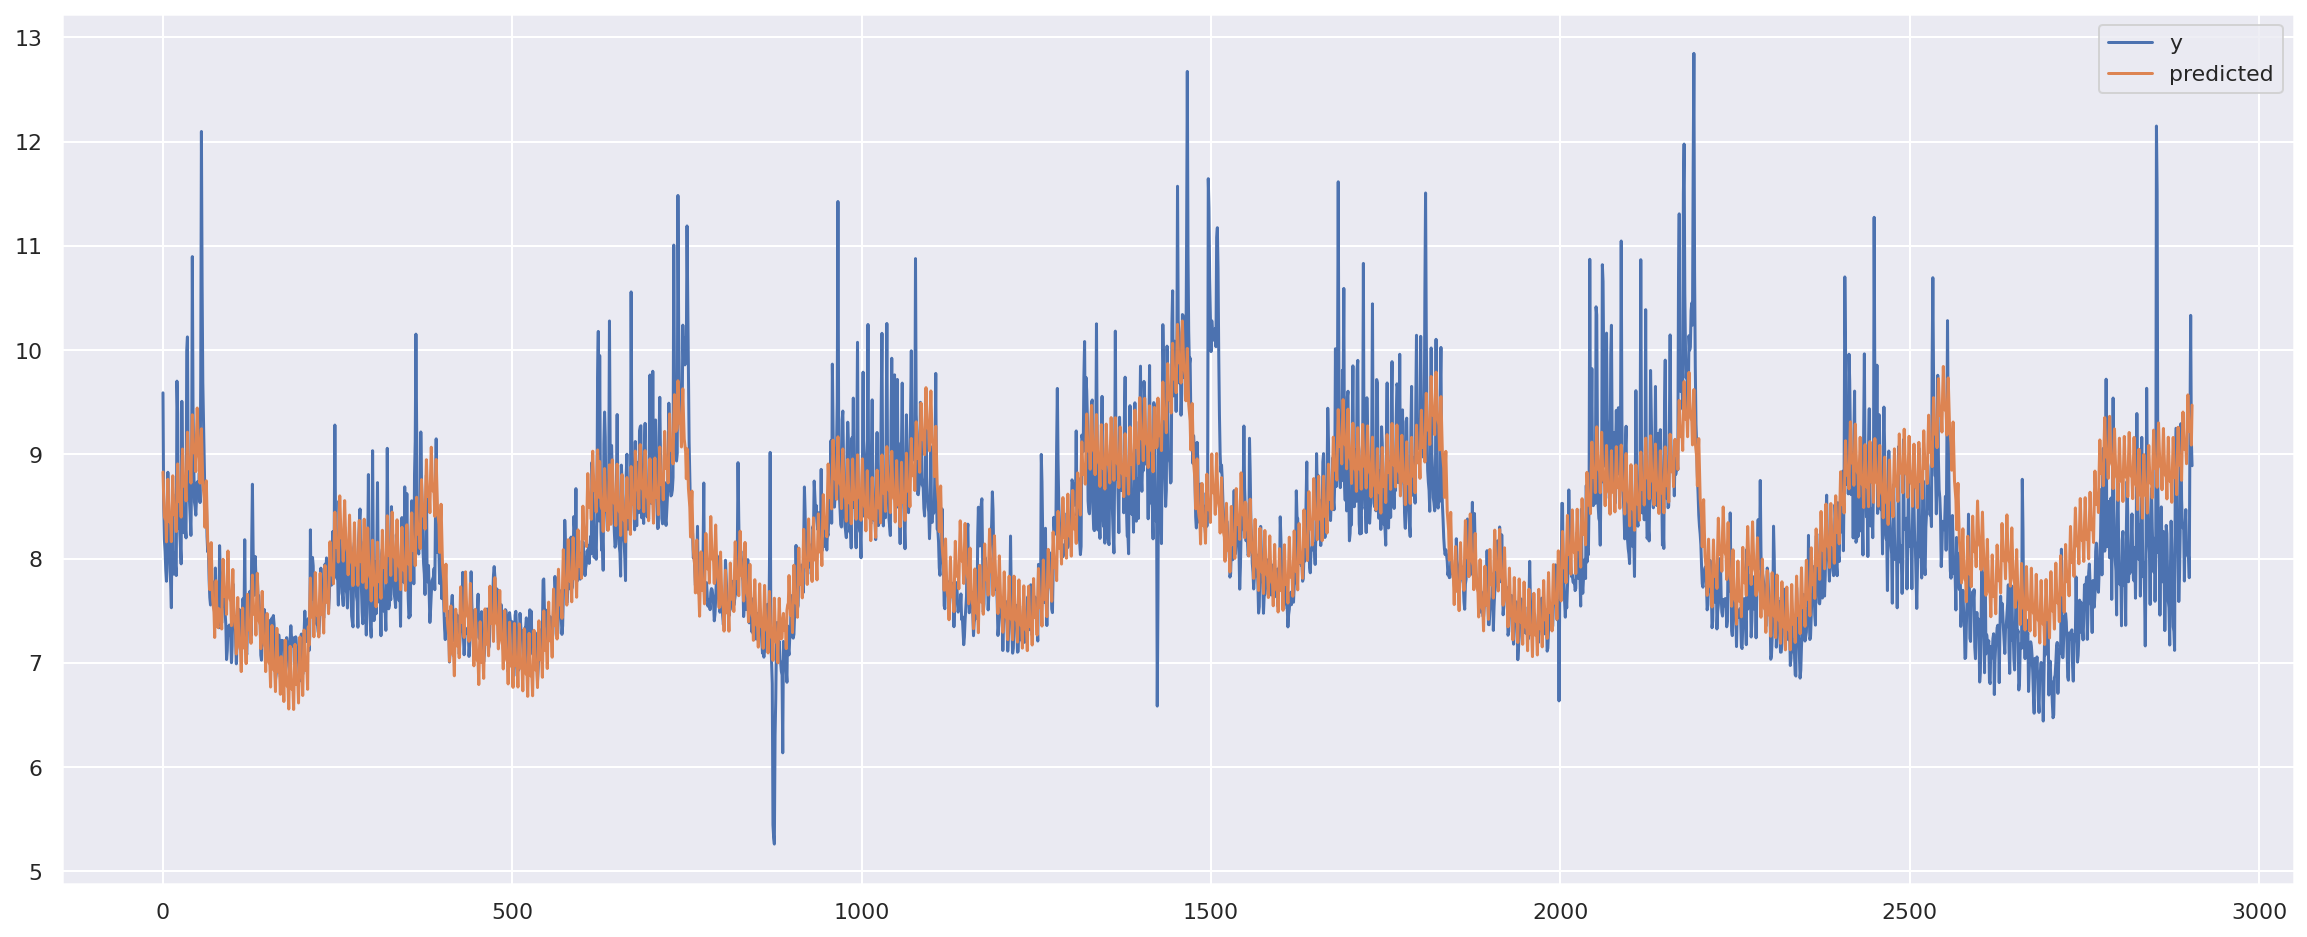

In [62]:
df[['y','predicted']].plot()

In [63]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

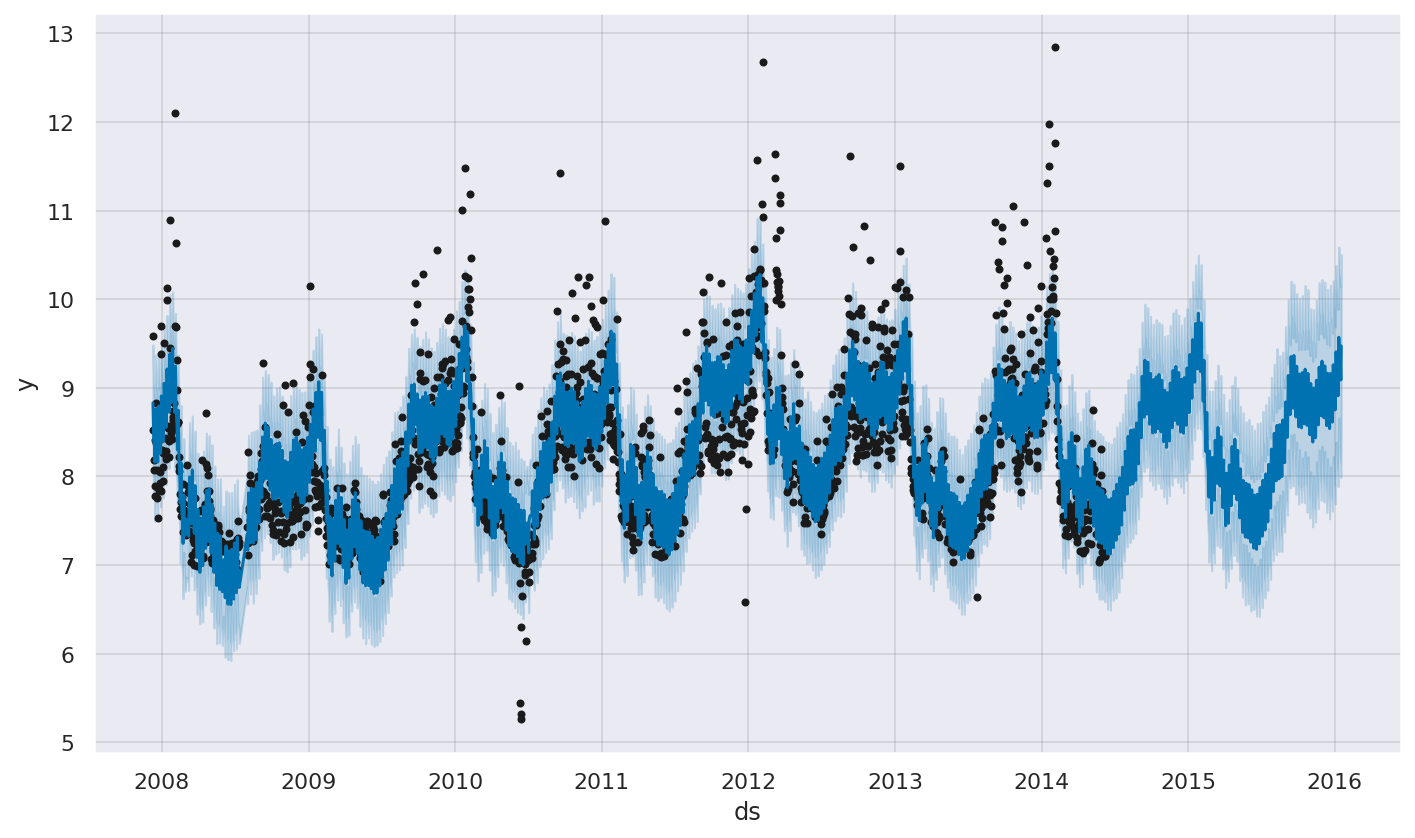

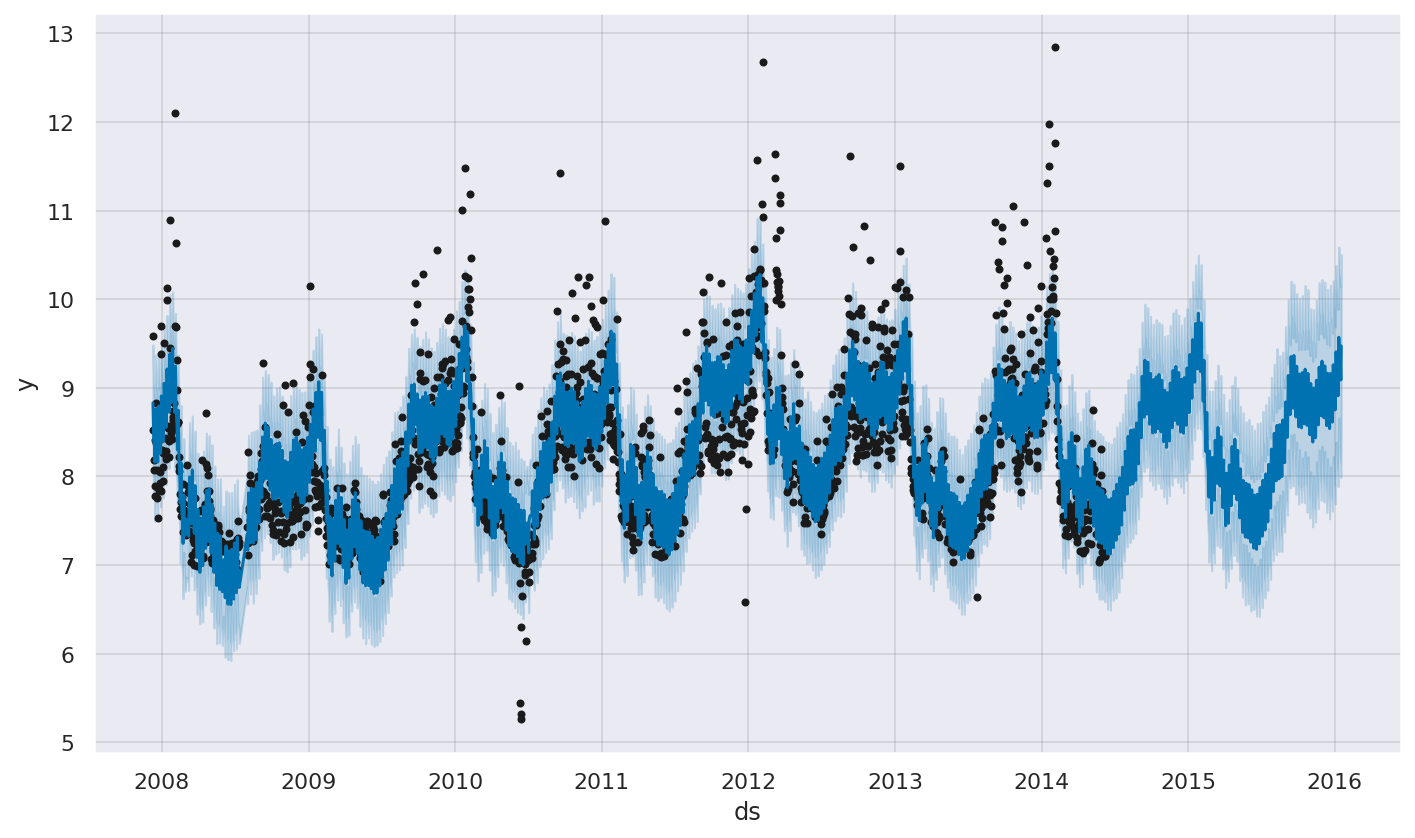

In [64]:
model.plot(prediction)

<AxesSubplot:>

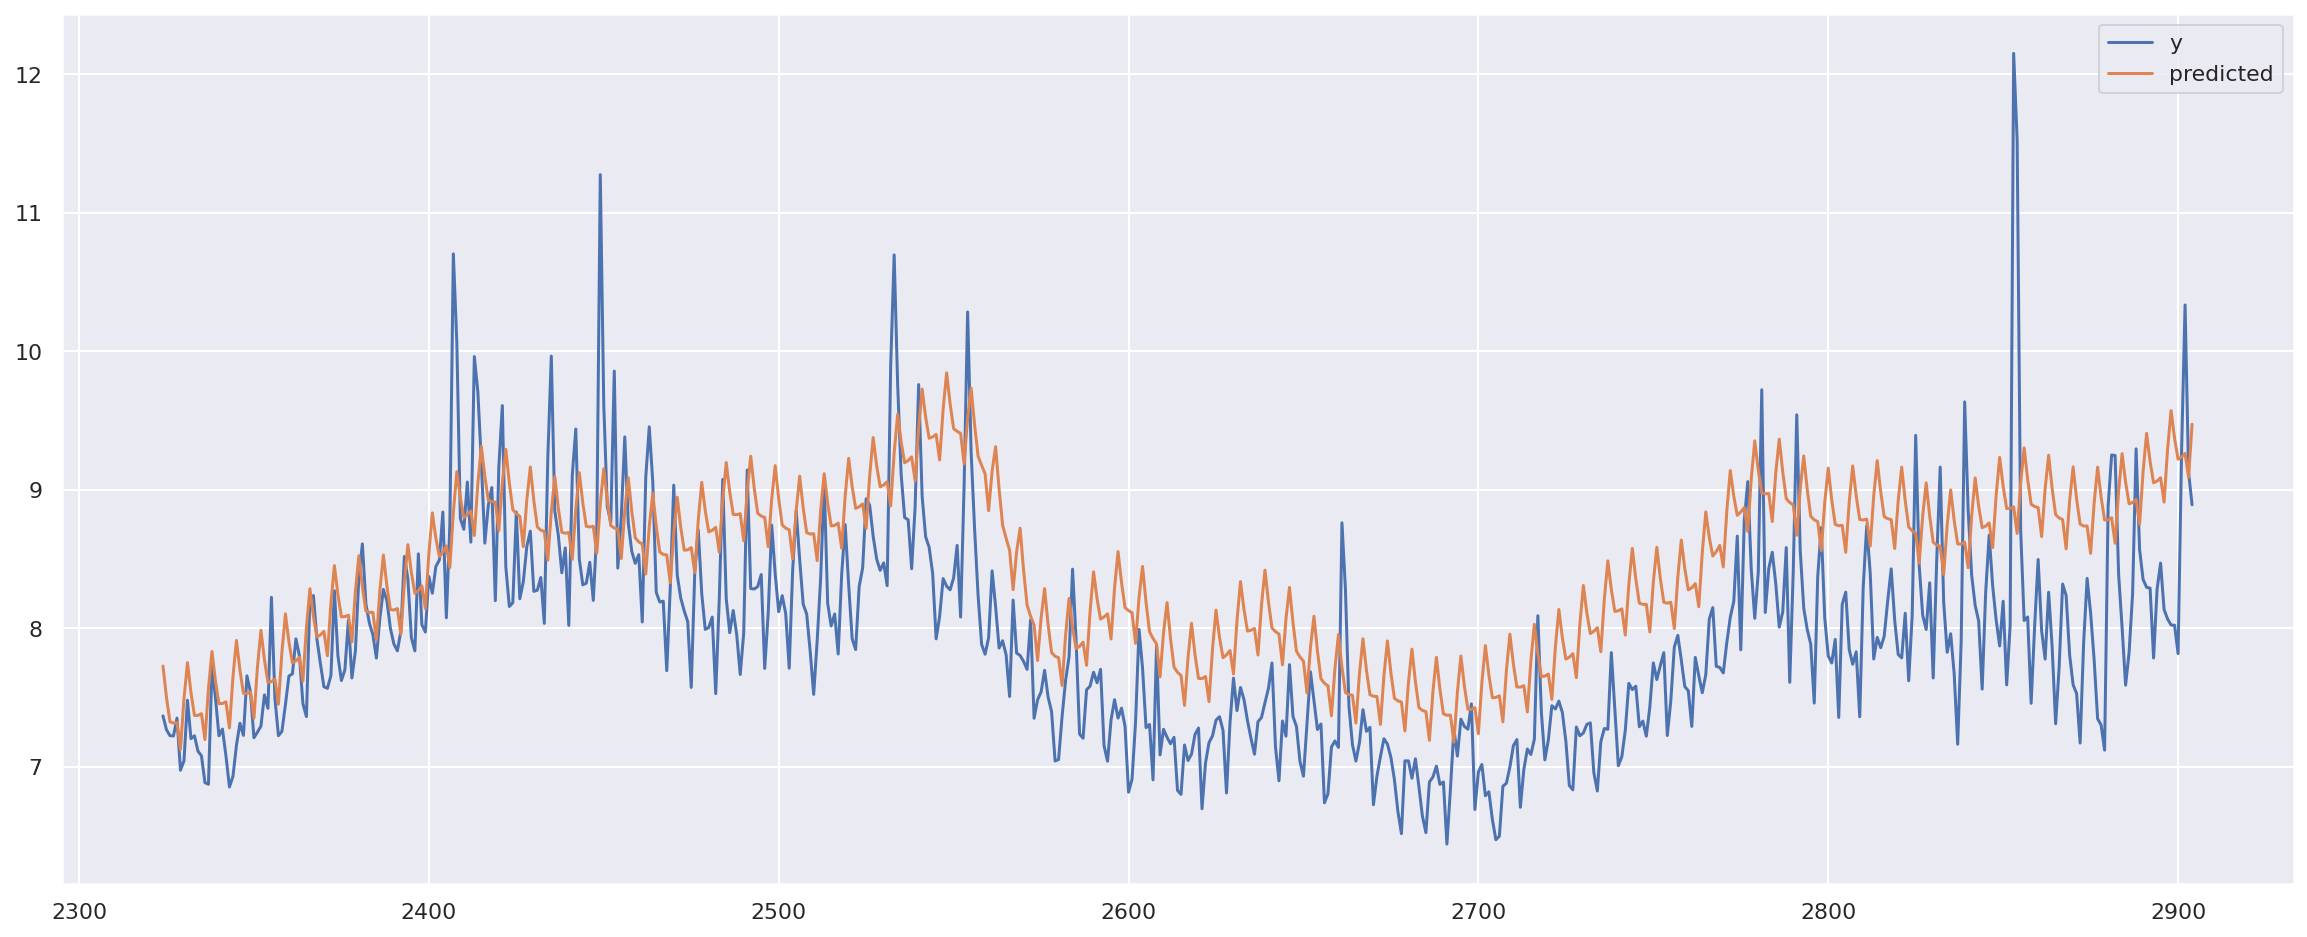

In [69]:
df.tail(581)[['y','predicted']].plot()

* #### We can see that this library is very well followed the test(unseen data ) 

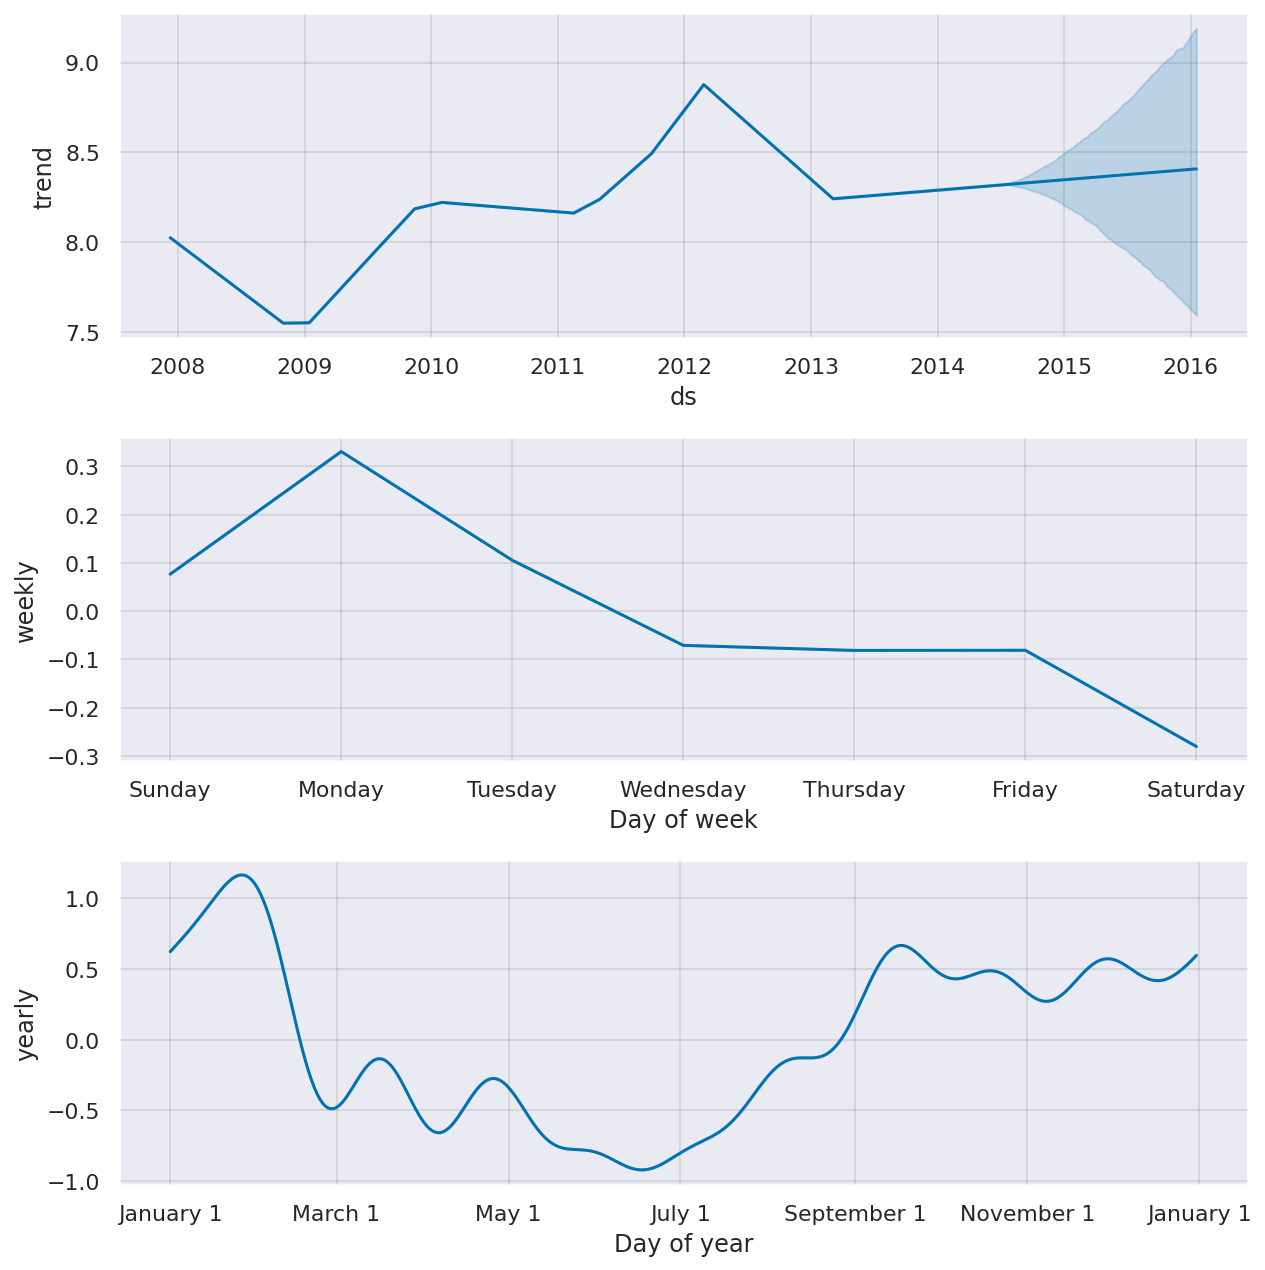

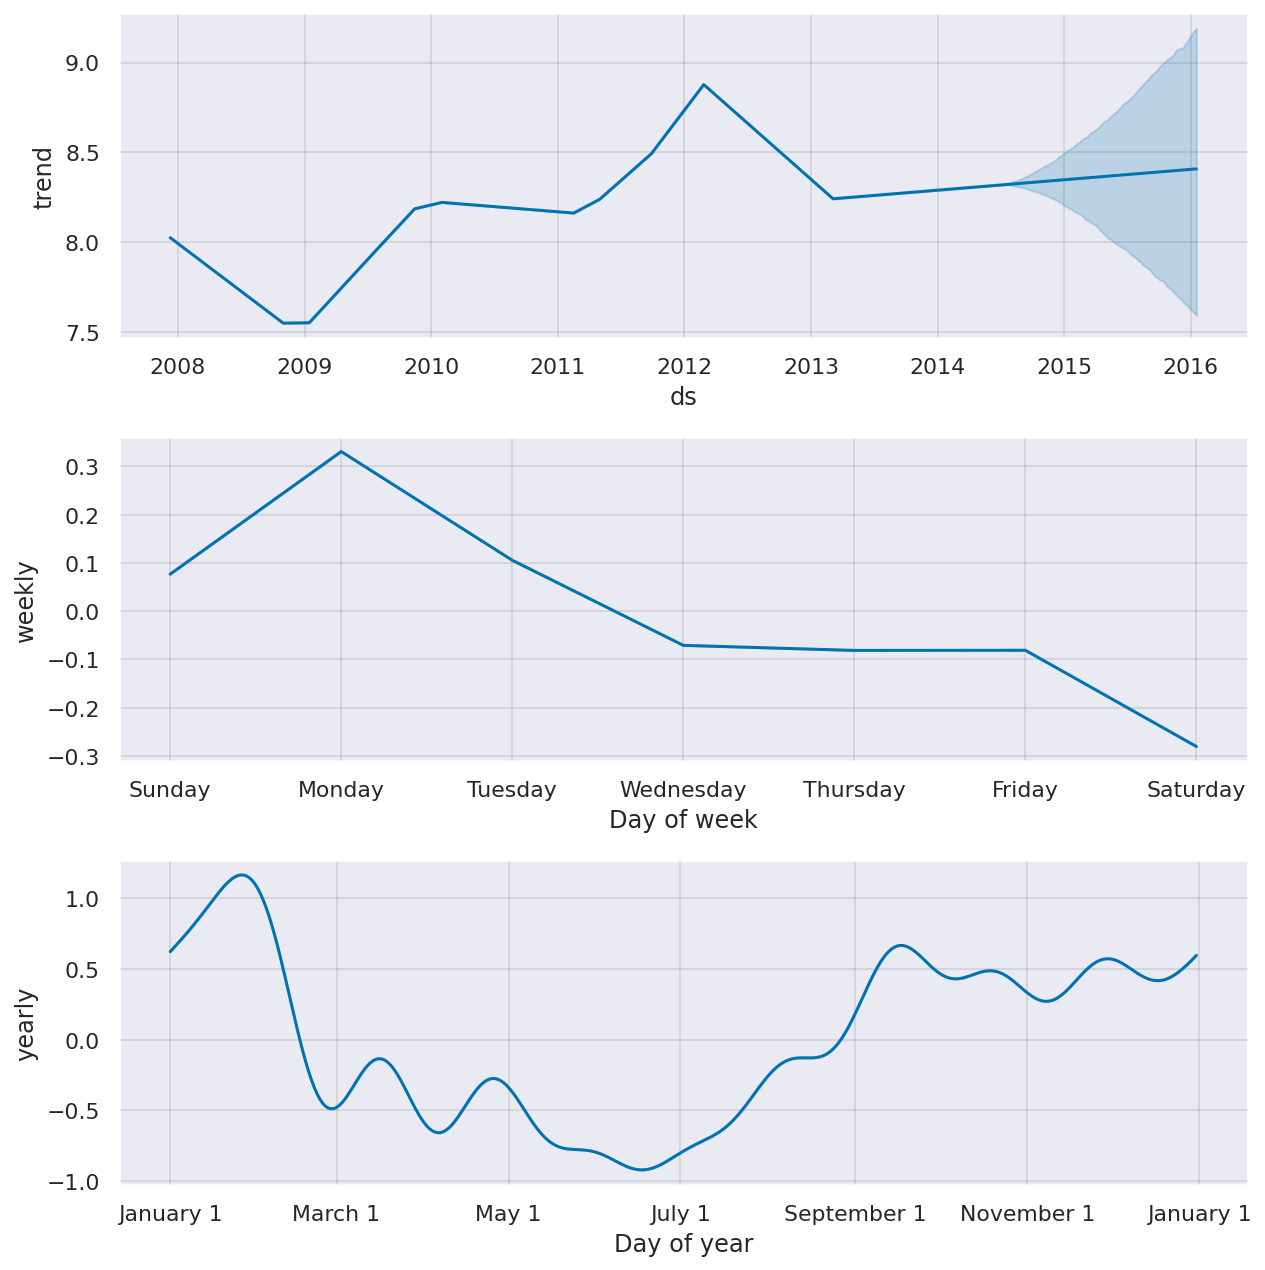

In [70]:
model.plot_components(prediction)

### Cross Validation
* For measuring forecast error by comparing the predicted values with the actual values
* initial: the size of the initial training period 
* period: the spacing between cutoff dates 
* horizon: the forecast horizon ( ds minus cutoff)
* by default: the inital training period is set to the three times the horizon, and cutoffs are made every half a horizon

In [74]:
train.shape

(2324, 2)

In [80]:
#### cross-validation
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial = '700 days', period = '180 days', horizon = '365 days')
df_cv

  0%|          | 0/8 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2010-01-03,9.196377,8.740713,9.680500,8.708640,2010-01-02
1,2010-01-04,9.510507,9.063588,9.976277,8.730044,2010-01-02
2,2010-01-05,9.298531,8.839484,9.752901,8.375630,2010-01-02
3,2010-01-06,9.154518,8.681017,9.627771,8.318986,2010-01-02
4,2010-01-07,9.123418,8.664969,9.587254,8.464425,2010-01-02
...,...,...,...,...,...,...
2884,2014-06-11,6.439890,5.744269,7.121599,7.439559,2013-06-15
2885,2014-06-12,6.409697,5.704008,7.129408,7.707962,2013-06-15
2886,2014-06-13,6.397387,5.686912,7.101809,7.350516,2013-06-15
2887,2014-06-14,6.192255,5.516608,6.898328,7.322510,2013-06-15


In [82]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,38 days,0.417502,0.646144,0.503116,0.058148,0.049497,0.630952
1,39 days,0.428465,0.654572,0.514961,0.059536,0.050625,0.620536
2,40 days,0.427928,0.654162,0.516136,0.059494,0.051453,0.613715
3,41 days,0.432200,0.657419,0.518479,0.059711,0.051680,0.604167
4,42 days,0.439153,0.662687,0.523852,0.060258,0.051893,0.597222


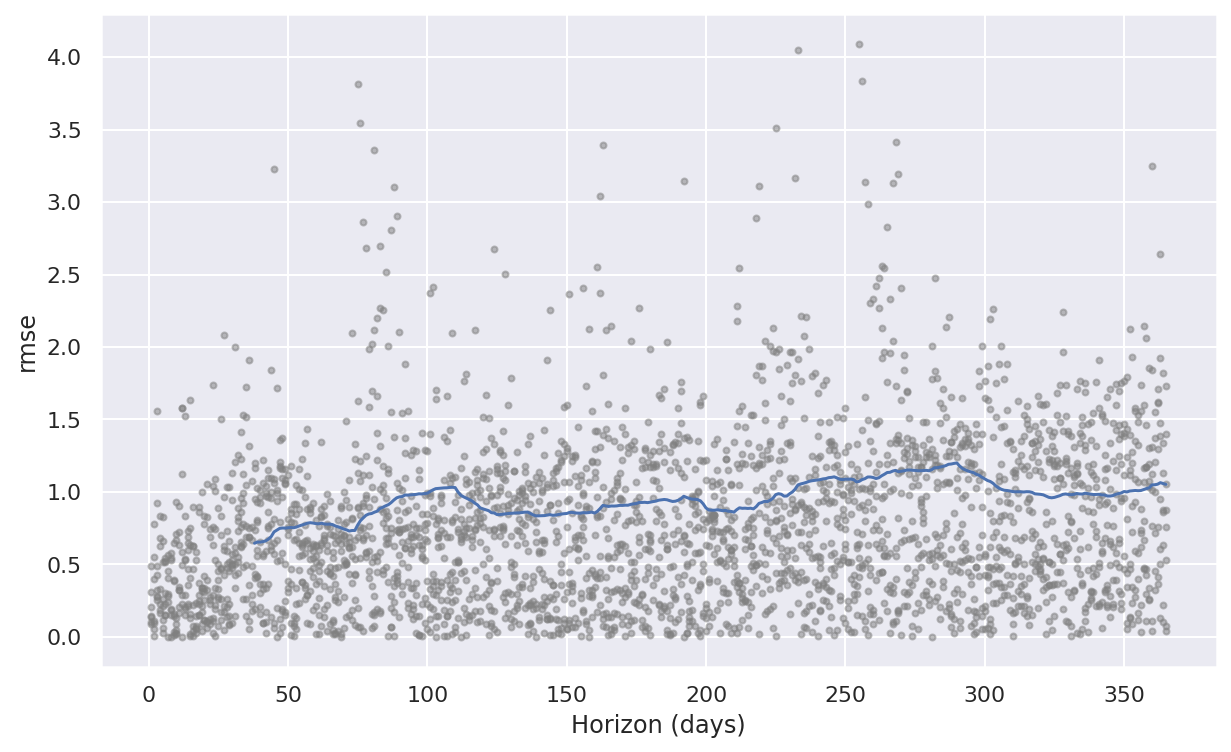

In [83]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric= 'rmse')


using crossvalidation we can see how model performs and we can see the error it does when we increase forecast steps 